# Lending Club Case Study
### Group_Facilitators
- Siddakka Saptasagare
- Kumarguru Muthuraj
## Business Understanding
   **You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:**
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

  **When a person applies for a loan, there are two types of decisions that could be taken by the company:**

- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

> Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

> Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

> Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives
  **This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.**
- The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
# Loading required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

### Loading and Extracting the loan zip file

In [2]:
# importing the zipfil elibrary required to extract and read the zip file
import zipfile as zf
filename= 'loan.zip'
loan = zf.ZipFile(filename,'r')
# extracting the files using 'extracall' method
print(loan.printdir()) 
loan.extractall()

File Name                                             Modified             Size
loan.csv                                       2017-05-16 14:10:10     34813575
None


In [3]:
#Creating the dataframe by using the csv file present in the zip file
df = pd.read_csv(loan.open('loan.csv'),low_memory=False, parse_dates=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Checking the shape of the dataframe
df.shape

(39717, 111)

In [5]:
# We observed that there are more then 100 columns present in our dataframe
#Lets use set_option to display all the columns of df
pd.set_option('display.max_columns', 200)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
# Checking the detailed of the data frame to know null/or empty values
df.info(max_cols=111, memory_usage='deep',null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

### Data Cleaning and fixing rows/Columns

In [7]:
# Lets drop the columns of the df having all null values
thresh = len(df) * .5
df.dropna(thresh = thresh, axis = 1, inplace = True)
print(df.shape)
df.head()

(39717, 54)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
# Checking the null values of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [9]:
# Lets reset the row index from default to id
df.set_index(['id'],inplace=True)
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
# Lets drop the irrelevent columns to get proper and structured data frame for analysis
# I am dropping the columns because the values of the column or either "0" or same
df.drop(['pymnt_plan','url','desc','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], inplace=True, axis=1)
print(df.shape)

(39717, 42)


In [11]:
# Lets replace special character and convert interest rate to float
df.int_rate = df['int_rate'].str.strip('%').astype('float')
df.revol_util = df['revol_util'].str.strip('%').astype('float')
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,48.832152,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,28.332634,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,25.400000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,49.300000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,72.400000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [12]:
# Lets do the data impuation for emp_title and emp_length columns
df.emp_title = df.emp_title.fillna(df.emp_title.mode()[0])
df.emp_length = df.emp_length.fillna(df.emp_length.mode()[0])
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [13]:
# Creating a new column to extract primary sector of investment from category_list
df['Issue_Month'], df['Issue_Year'] = df['issue_d'].str.split('-').str
df['last_credit_pull_month']= df.last_credit_pull_d.str.split('-').str[0].str.upper()
df['last_credit_pull_Year']= df.last_credit_pull_d.str.split('-').str[1]
df['last_pymnt_month']= df.last_pymnt_d.str.split('-').str[0].str.upper()
df['last_pymnt_year']= df.last_pymnt_d.str.split('-').str[1]
df['earl_cr_line_month']= df.earliest_cr_line.str.split('-').str[0].str.upper()
df['earl_cr_line_year']= df.earliest_cr_line.str.split('-').str[1]
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issue_Month,Issue_Year,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,earl_cr_line_month,earl_cr_line_year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,11,MAY,16,JAN,15,JAN,85
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,11,SEP,13,APR,13,APR,99
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,11,MAY,16,JUN,14,NOV,01
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,11,APR,16,JAN,15,FEB,96
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,11,MAY,16,MAY,16,JAN,96


In [14]:
# Lets check the details of addr_state
print(df.addr_state.unique())

# lets create Region column depedning on the state column value
# I have taken data from Google and wiki pages
Far_West = ['CA','HI', 'NV']
Great_Lakes = ['IL','IN','MI','MN','OH','WI']
Midsouth=['DE','KY','MD' ,'NC' ,'TN', 'VA', 'WV']
Midwest= ['IA','AR', 'MO','NE', 'ND', 'SD']
Mountain_West =['AZ', 'CO', 'ID', 'MT', 'NM', 'UT', 'WY']
New_England = ['CT','ME', 'MA', 'NH', 'RI', 'VT']
Northeast = ['NJ','NY','PA']
Northwest = ['OR', 'WA']
South_Central = ['AR', 'LA','OK','TX']
Southeast = ['AL','FL','GA','MS','SC','PR']
df['Region']= np.nan

def map_region(state):
    if state in Far_West:
        return 'Far_West'
    elif state in Great_Lakes:
        return 'Great_Lakes'
    elif state in Midsouth:
        return 'Midsouth'
    elif state in Midwest:
        return 'Midwest'
    elif state in Mountain_West:
        return 'Mountain_West'
    elif state in New_England:
        return 'New_England'
    elif state in Northeast:
        return 'Northeast'
    elif state in South_Central:
        return 'South_Central'
    elif state in Southeast:
        return 'Southeast'
    elif state in Northwest:
        return 'Northwest'
df['Region'] = df['addr_state'].apply(map_region)
df.head()

['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issue_Month,Issue_Year,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,earl_cr_line_month,earl_cr_line_year,Region
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,11,MAY,16,JAN,15,JAN,85,Mountain_West
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,11,SEP,13,APR,13,APR,99,Southeast
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,11,MAY,16,JUN,14,NOV,01,Great_Lakes
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,11,APR,16,JAN,15,FEB,96,Far_West
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,11,MAY,16,MAY,16,JAN,96,Northwest


In [15]:
# lets standardize the empl_length column
def emp_length(val):
    return (val.replace("years","").replace("+","").replace("<","").replace("year",""))
df.emp_length=df.emp_length.apply(emp_length)
df.emp_length=df.emp_length.astype(int)
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issue_Month,Issue_Year,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,earl_cr_line_month,earl_cr_line_year,Region
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,11,MAY,16,JAN,15,JAN,85,Mountain_West
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,11,SEP,13,APR,13,APR,99,Southeast
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,11,MAY,16,JUN,14,NOV,01,Great_Lakes
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,11,APR,16,JAN,15,FEB,96,Far_West
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,11,MAY,16,MAY,16,JAN,96,Northwest


### Lets do the Loan similarity distribution
- What amount of loan has been issued
- What is frequency distribution loan over a period

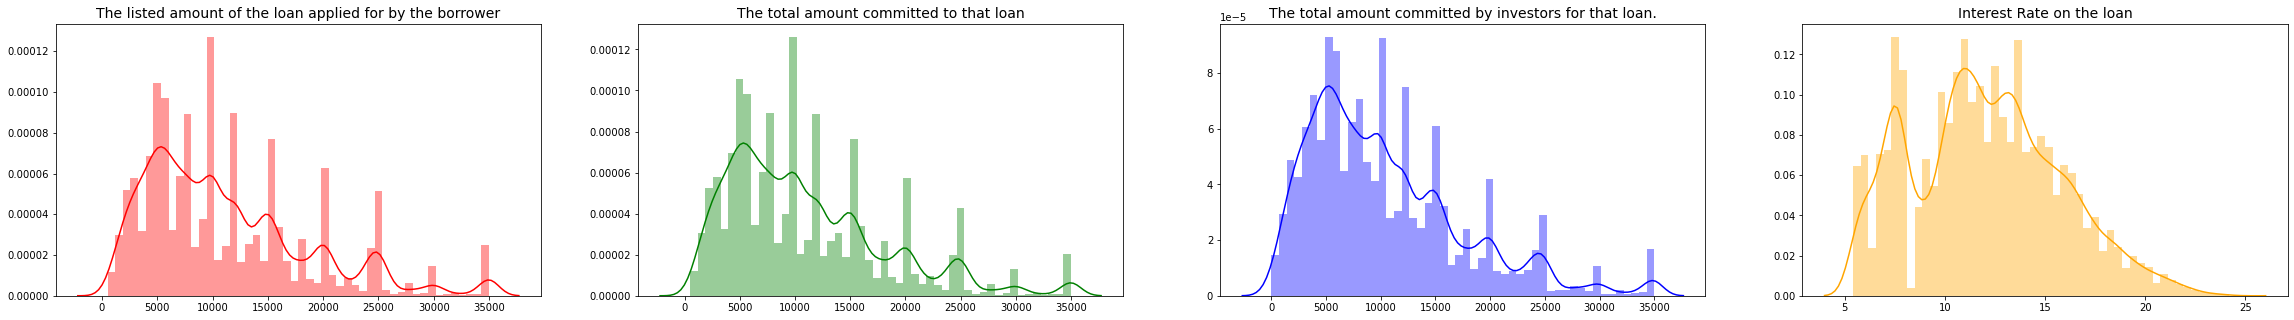

In [16]:
# Lets create the subsets to plot the distribution of loan amount
Loan_Amount = df.loan_amnt.values
Funded_Amount= df.funded_amnt.values
Investor_Amount= df.funded_amnt_inv.values
Interest_Rate =df.int_rate.values
No_Of_Installment= df.installment.values

fig, ax = plt.subplots(1, 4, figsize=(40,5))

# Lets draw the distribution plot for the above subsets
sns.distplot(Loan_Amount, ax=ax[0], color='red')
sns.distplot(Funded_Amount, ax=ax[1], color='green')
sns.distplot(Investor_Amount, ax=ax[2], color='blue')
sns.distplot(Interest_Rate, ax=ax[3], color='orange')

# Lets set the title for each plots
ax[0].set_title("The listed amount of the loan applied for by the borrower", fontsize=14)
ax[1].set_title("The total amount committed to that loan", fontsize=14)
ax[2].set_title("The total amount committed by investors for that loan.", fontsize=14)
ax[3].set_title("Interest Rate on the loan", fontsize=14)
plt.show()

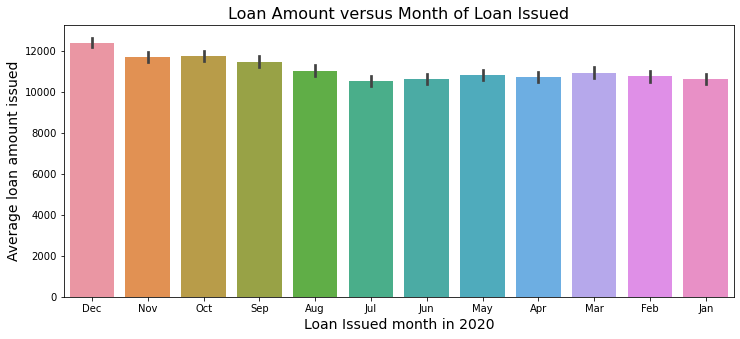

In [17]:
# Lets draw a plot a bar graph to see the loan amount vs Year of Loan Issued
plt.figure(figsize=(12,5))
sns.barplot('Issue_Month', 'loan_amnt', data=df)
plt.title('Loan Amount versus Month of Loan Issued', fontsize=16)
plt.xlabel('Loan Issued month in 2020', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)
plt.show()

**From the above graph we can coonclude that most of loans were issued in month Dec and Nov.**

## Good Loan vs Bad Loans
  **Lets see the no. of Bad loans in Dataframe to find out the risk of load falling into default category.**

In [18]:
# Lets check the status of the loans given by Lending club
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

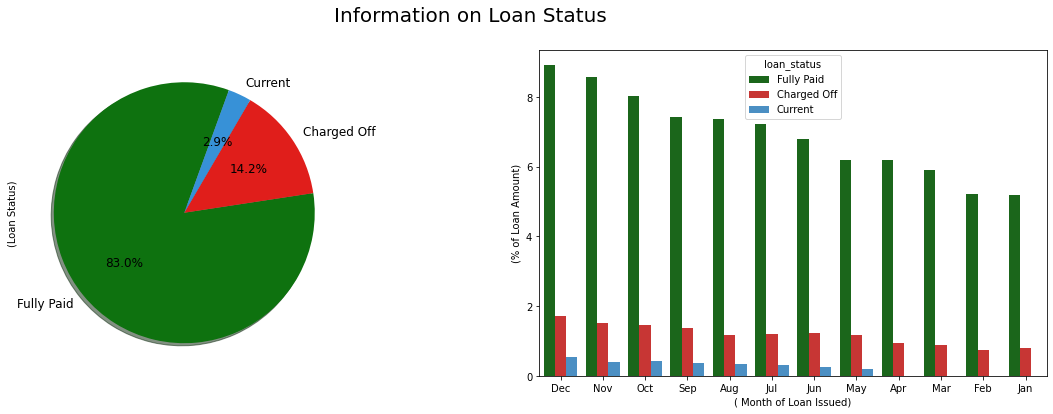

In [19]:
# Plotting the Loan status chart check the % of the Loan Status
f, ax = plt.subplots(1,2, figsize=(20,6))
# Plotting Pie chart
plt.suptitle('Information on Loan Status', fontsize=20)
palette = ["#0E720F","#E01E1B", "#3791D7"]
df["loan_status"].value_counts().plot.pie(ax=ax[0], colors = palette, shadow=True,  fontsize=12, startangle=70, autopct='%1.1f%%')
ax[0].set(ylabel="(Loan Status)")

#Plotting Bar Chart
sns.barplot(x="Issue_Month", y="loan_amnt", hue="loan_status", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(% of Loan Amount)")
ax[1].set(xlabel="( Month of Loan Issued)")
plt.show()

**From the above graph its clear that the loans that are charged off are the bad loans. Aound 14.2 % of loans are bad loans**

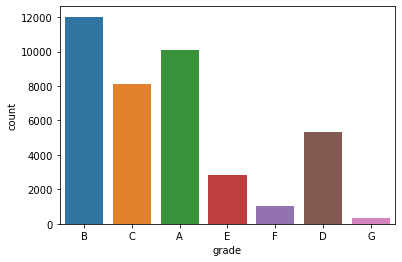

In [20]:
# Lets plot a graph of Credit grade to which grade has issued most loans
sns.countplot(data= df, x='grade')
plt.show()

  **From the above graph we can conclude that most of loans were issued to grade A and B**

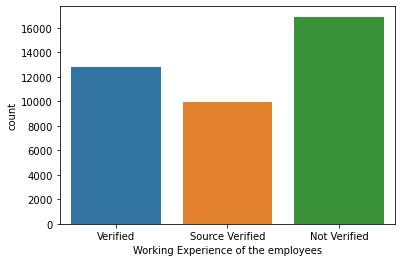

In [21]:
# lets plot a graph to check the impact of Verification status
sns.countplot(data= df, x='verification_status')
plt.xlabel('Working Experience of the employees')
plt.show()

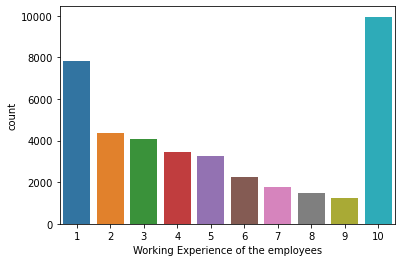

In [22]:
# lets plot a graph to check the impact of employee experience on loan issued
sns.countplot(data= df, x='emp_length')
plt.xlabel('Working Experience of the employees')
plt.show()

**From the above graph we can conclude that most of loans were issued employees having 10+ years of experience**

### From the above graphs we can conclude as below:
- The Far_West Region has got the loan at lowest Interest rate among other regions of US
- The Far_West Region has less experienced employees who have received the loan among other regions of US
- The Far_West Region has Lowest debt to income Ration among other regions of US
- The Far_West Region has lowest income among other regions of US

## Lets do the Analysi of Bad loan vs different variables

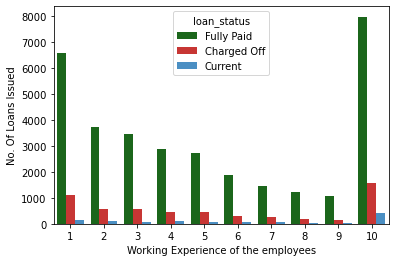

In [23]:
# Plot of Laon vs Eployee length or experience
palette = ["#0E720F","#E01E1B", "#3791D7"]
sns.countplot(data = df, x='emp_length', hue='loan_status', palette=palette)
plt.xlabel('Working Experience of the employees')
plt.ylabel('No. Of Loans Issued')
plt.show()

  **Majoring of the employees having 1 year or 10+ years are being charged off**

### Lets see the distribution of the annual income of the employees

In [24]:
# Lets create a column to see if the loan issued is benificial for lending club or not
df['Loan_Result']=(df['total_pymnt']-df['funded_amnt'])*100/df['funded_amnt']
# Loan to income Ratio
df['Loan_to_inc_ration'] = df.funded_amnt*100/df.annual_inc
# Annula income in thousand Dollers
df['annual_inc'] = df['annual_inc'] / 1000
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issue_Month,Issue_Year,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,earl_cr_line_month,earl_cr_line_year,Region,Loan_Result,Loan_to_inc_ration
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10,RENT,24.000,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,11,MAY,16,JAN,15,JAN,85,Mountain_West,17.263104,20.833333
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30.000,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,11,SEP,13,APR,13,APR,99,Southeast,-59.651600,8.333333
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10,RENT,12.252,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,11,MAY,16,JUN,14,NOV,01,Great_Lakes,25.236119,19.588639
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49.200,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,11,APR,16,JAN,15,FEB,96,Far_West,22.318900,20.325203
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80.000,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,11,MAY,16,MAY,16,JAN,96,Northwest,17.111000,3.750000


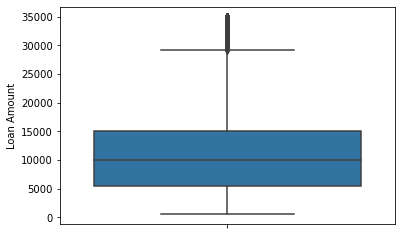

In [25]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

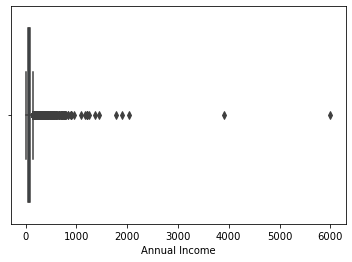

In [26]:
sns.boxplot( x=df["annual_inc"] )
plt.xlabel('Annual Income')
plt.show()

#### From the above graphs we can conclude the below points
- The amount of loan issued lies between 5000 to 15000 USD
- The annual income of the most applicants is <1000 k USD

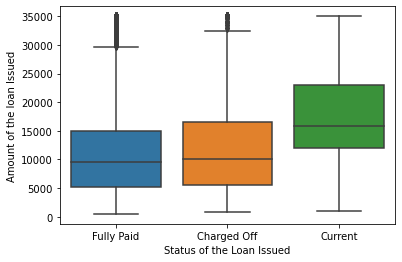

In [27]:
# Lets see if there is any relation between the loan amount funded and the loan status
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Amount of the loan Issued')
plt.xlabel('Status of the Loan Issued')
plt.show()

  **From the above graph we can conclude that Amount of the loan issued is not dependent on the Loan status

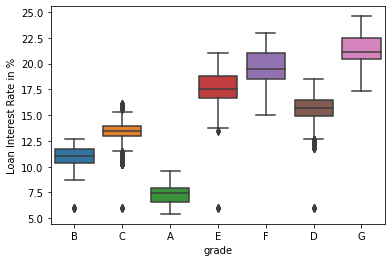

In [28]:
# Lets see the relation of Credit grade and the interest rate
sns.boxplot(y='int_rate', x='grade', data=df)
plt.ylabel('Loan Interest Rate in %')
plt.show()

  **From the above graph we can conclude that the Grade A and B have received the loan with minimum interest rate and Grade G has received loan with maximum interest rate**

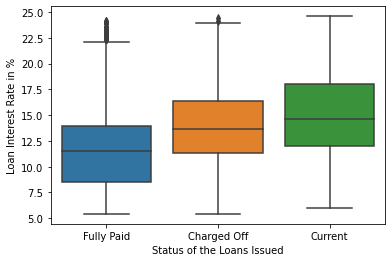

In [29]:
# Lets see the relation of Interest rate and the interest rate
sns.boxplot(y='int_rate', x='loan_status', data=df)
plt.ylabel('Loan Interest Rate in %')
plt.xlabel('Status of the Loans Issued')
plt.show()


**From the above graph we can conclude that the interest rate of charged off loans is greater then the fully paid**

### Lets check the relation between the Loan purpose and the Loan status

In [30]:
# Lets check the details of loan purpose
df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

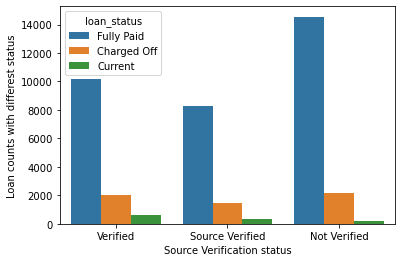

In [31]:
# Lets draw a graph to show the loan status vs purpose
sns.countplot(x='verification_status', hue="loan_status", data=df)
plt.ylabel('Loan counts with differest status')
plt.xlabel('Source Verification status')
plt.show()

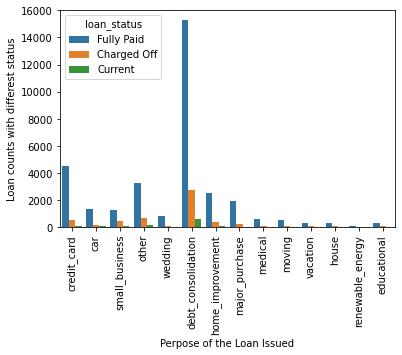

In [32]:
# Lets draw a graph to show the loan status vs purpose
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.ylabel('Loan counts with differest status')
plt.xlabel('Perpose of the Loan Issued')
plt.xticks(rotation=90)
plt.show()

### From the above graph we can conclude below points:
1. Loans Issued for the perpose of Debt Consolidation are being paid off
2. Loans Issued for the perpose of Debt Consolidation are being Charged off

### Lets see if there is any impact of terms i.e. the loan terms in months on the loan status

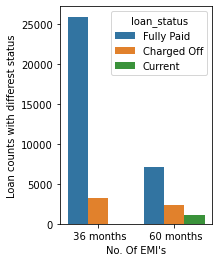

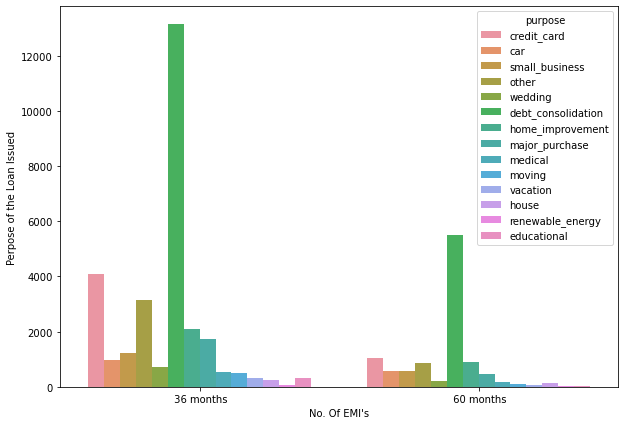

In [33]:
plt.subplot(1,2,1)
sns.countplot( x="term", hue='loan_status', data=df)
plt.ylabel('Loan counts with differest status')
plt.xlabel("No. Of EMI's")
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=df)
plt.xlabel("No. Of EMI's")
plt.ylabel('Perpose of the Loan Issued')
plt.show()

#### From the above graph we can conclude that the loans issued with 36 months tenure and Debt Consolidation are being charged off and they have high probability of becoming defaulters

### Lets check the relation between home ownership and the Loan status
- As the maximum count of loans paid off and charged are having either rented house or the mortagage, so we dont see any correlation

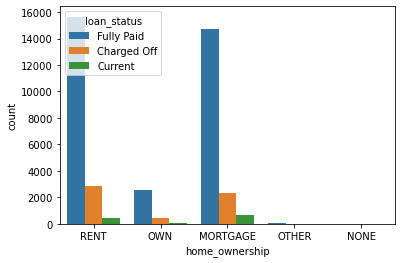

In [34]:
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.show()

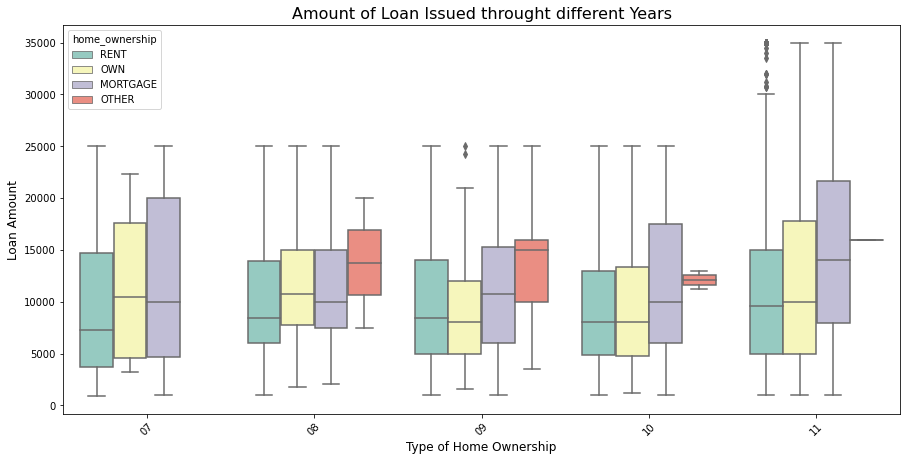

In [35]:
plt.figure(figsize=(15,8))
bad_df = df.loc[df['loan_status'] == 'Charged Off']
g1 = sns.boxplot(x='Issue_Year', y='loan_amnt', hue='home_ownership', data=bad_df, palette="Set3")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Type of Home Ownership", fontsize=12)
g1.set_ylabel("Loan Amount", fontsize=12)
g1.set_title("Amount of Loan Issued throught different Years", fontsize=16)
plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

### Lets check the relation between loan status, loan amount and the bankcrupticies

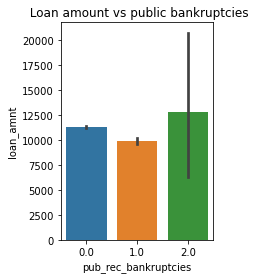

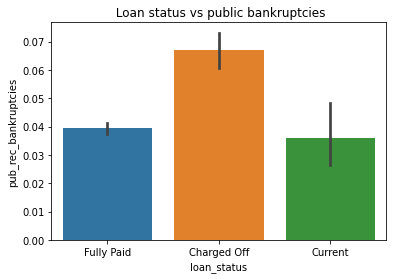

In [36]:
plt.subplot(1,2,1)
sns.barplot(y='loan_amnt', x='pub_rec_bankruptcies', data=df)
plt.title(' Loan amount vs public bankruptcies')
plt.show()
sns.barplot(x='loan_status', y='pub_rec_bankruptcies', data=df)
plt.title(' Loan status vs public bankruptcies')
plt.show()

## Lets do multivariant analysis

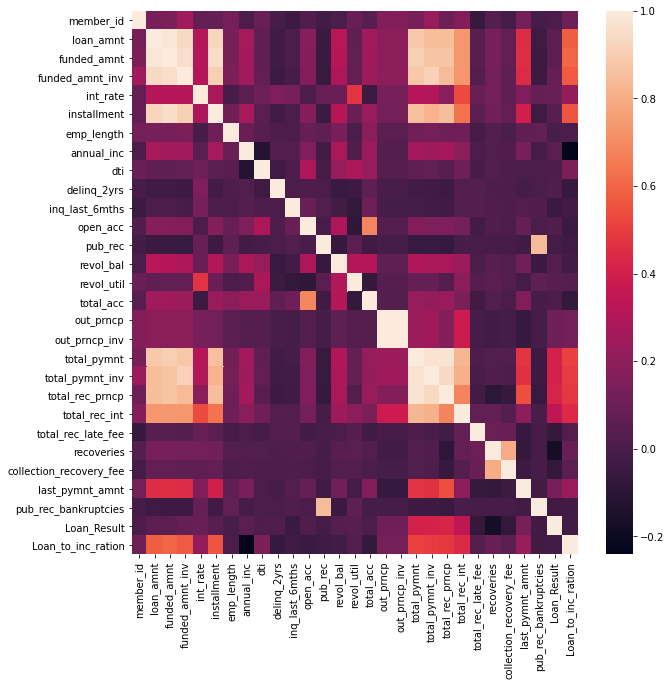

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

## Lets see the frequency of loan in different regions of the country
  **By analysing the different regions and loan amount we got to know that far_west region has received maximun loan.**

In [38]:
# Lets create a loan_group df to see the insights
Loan_group = df.groupby(['Issue_Month','Region'], as_index=False).sum()
Loan_group.loan_amnt = Loan_group.loan_amnt/1000
Loan_group.head()

,Issue_Month,Region,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,Loan_Result,Loan_to_inc_ration
0,Apr,Far_West,422918195,6056.800,5940850,5.654459e+06,6584.31,180429.17,2794,38161.21614,7047.25,91,396,4829,30,7505632,26635.66,11020,0.0,0.0,6.421507e+06,6108043.05,5233779.02,1125497.17,720.503424,61510.36,10633.8845,1396063.00,29.0,4265.957524,9680.996215
1,Apr,Great_Lakes,268165474,3664.575,3616125,3.405142e+06,4148.98,108184.98,1895,21952.46453,4885.02,51,407,3443,29,4311606,15877.85,8142,0.0,0.0,3.901804e+06,3669078.42,3160756.93,696925.37,274.526191,43846.75,5121.2003,806138.23,25.0,2535.746381,6687.546090
2,Apr,Midsouth,228044857,3305.700,3238200,3.084790e+06,3402.17,94912.51,1448,20465.53146,3904.38,51,233,2700,18,4049457,14205.40,6578,0.0,0.0,3.663482e+06,3483053.63,2968439.23,667119.19,625.760862,27297.78,5247.1767,754440.28,10.0,3286.212913,5119.378651
3,Apr,Midwest,55632085,669.375,664950,6.275524e+05,864.16,19123.01,421,4376.16240,992.36,12,68,690,7,687343,2851.40,1770,0.0,0.0,7.450382e+05,720071.38,606510.91,134470.49,15.000000,4041.80,534.8782,217153.84,5.0,649.217296,1235.031726
4,Apr,Mountain_West,128375023,1718.300,1692950,1.568393e+06,2042.78,51452.82,828,10835.16656,2190.18,24,153,1547,12,1822155,8195.79,3843,0.0,0.0,1.816920e+06,1695622.75,1506238.47,306060.45,190.616575,4430.75,695.9300,426760.13,10.0,1155.652110,3165.434989


In [39]:
# lets plot the graph to see correlation
df_dates = pd.DataFrame(data=Loan_group[['Issue_Month','Region','loan_amnt']])
by_issued_amount = df_dates.groupby(['Issue_Month', 'Region']).loan_amnt.sum()
by_issued_amount.head()

Issue_Month  Region       
Apr          Far_West         6056.800
             Great_Lakes      3664.575
             Midsouth         3305.700
             Midwest           669.375
             Mountain_West    1718.300
Name: loan_amnt, dtype: float64

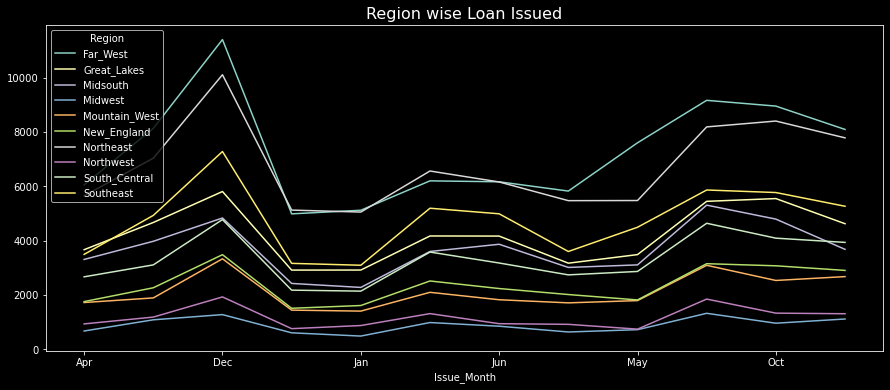

In [40]:
# lets plot the graph to see correlation
plt.style.use("dark_background")
cmap = plt.cm.Set3
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))
plt.title('Region wise Loan Issued', fontsize=16)
plt.show()

 **The above graph shows that the Fas_West region has received the maximum amount of Loan.**

#### Lets verify the dependency of employement length, anual income, interest rate, debt to income ration region wise

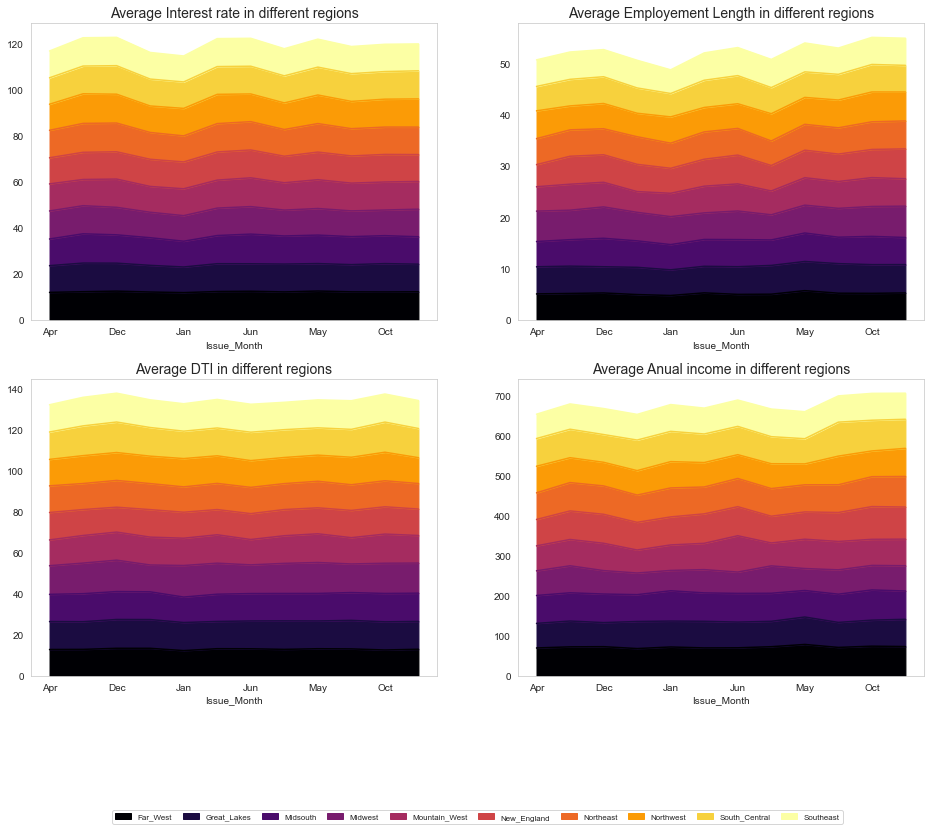

In [41]:
# lets draw the plot
sns.set_style('whitegrid')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno
by_int_rate = df.groupby(['Issue_Month', 'Region']).int_rate.mean()
by_int_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest rate in different regions', fontsize=14)
by_emp_length = df.groupby(['Issue_Month', 'Region']).emp_length.mean()
by_emp_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employement Length in different regions', fontsize=14)
by_dti = df.groupby(['Issue_Month', 'Region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average DTI in different regions', fontsize=14)
by_income = df.groupby(['Issue_Month', 'Region']).annual_inc.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Anual income in different regions', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=8,prop={'size':8},ncol=10, mode="expand", borderaxespad=0.)
plt.show()

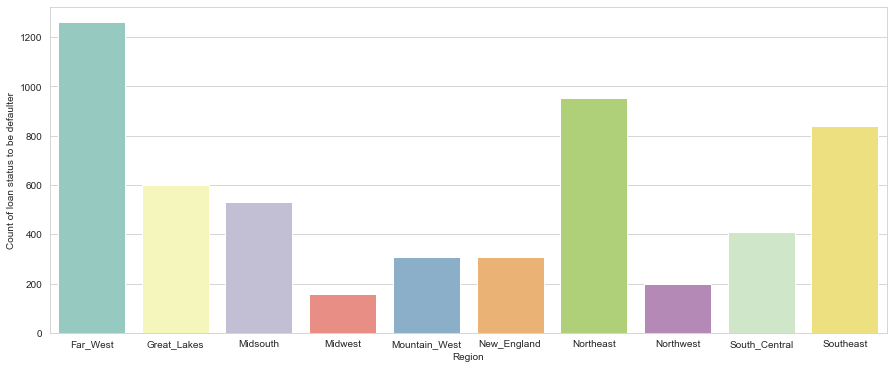

In [42]:
#Lets check the region wise loan status
g = df[df['loan_status']=='Charged Off'].groupby('Region')['loan_status'].count().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(x='Region', y='loan_status', data=g)
plt.ylabel('Count of loan status to be defaulter')
plt.xlabel('Region')
plt.show()

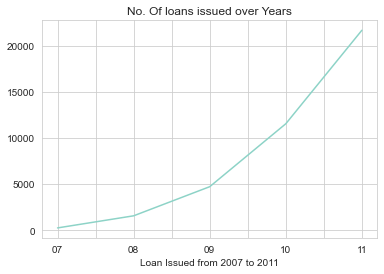

In [43]:
g = df.groupby('Issue_Year')['loan_status'].count()
g.plot.line(x_compat=True)
#plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No. Of loans issued over Years')
plt.xlabel('Loan Issued from 2007 to 2011')
plt.show()

**From the above graph we can see that the loan issued over the years are expenentially increasing.**

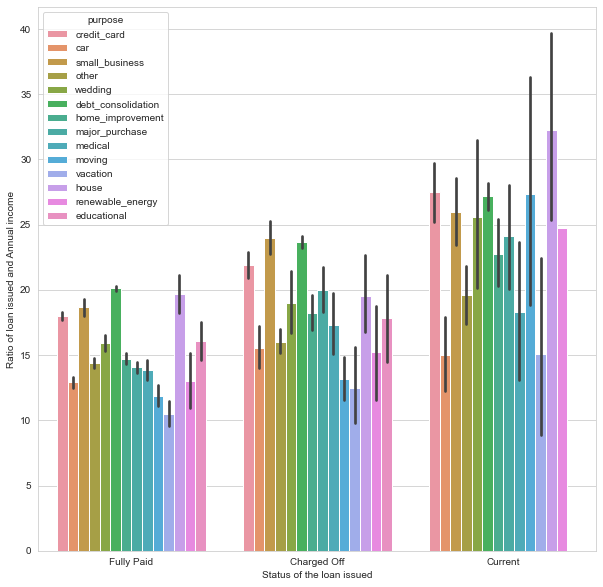

In [44]:
# Lets check the relation between loan to income ratio vs Laon status for different perpose
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='Loan_to_inc_ration',hue='purpose',data=df)
plt.xlabel('Status of the loan issued')
plt.ylabel('Ratio of loan issued and Annual income')
plt.show()

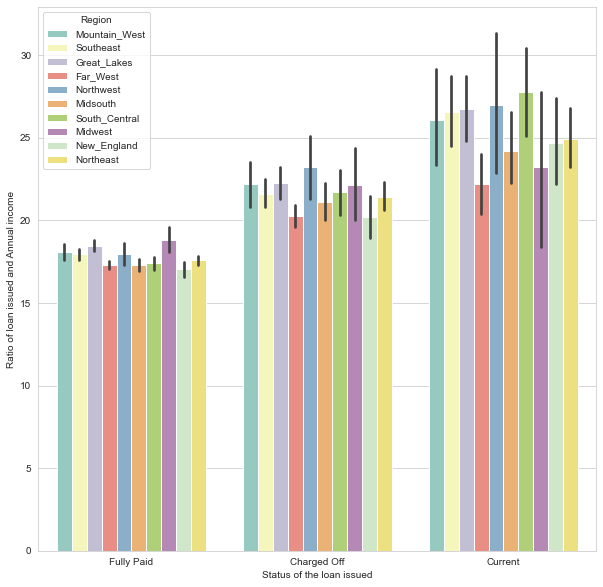

In [45]:
# Lets check the relation between loan to income ratio vs Laon status for different Region
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='Loan_to_inc_ration',hue='Region',data=df)
plt.xlabel('Status of the loan issued')
plt.ylabel('Ratio of loan issued and Annual income')
plt.show()

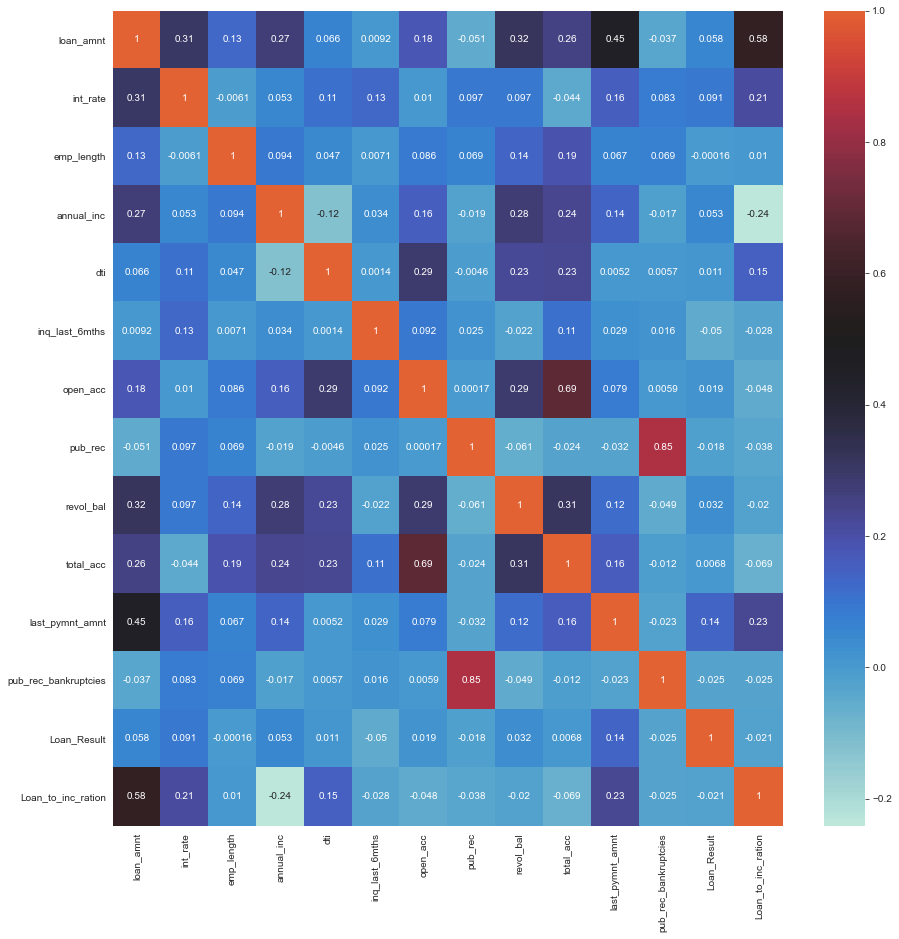

In [46]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'term','emp_length', 'annual_inc','dti', 'grade', 'Region','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','pub_rec_bankruptcies','Loan_Result','Loan_to_inc_ration']
corr = df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.show()

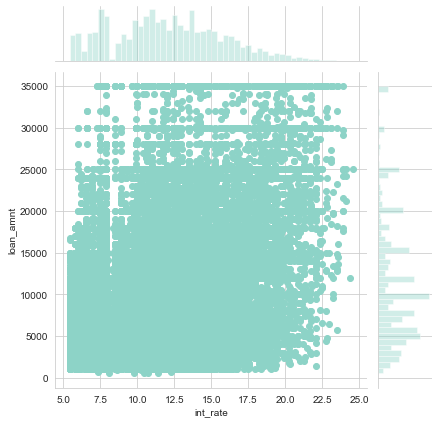

In [47]:
sns.jointplot('int_rate', 'loan_amnt', df)
plt.show()

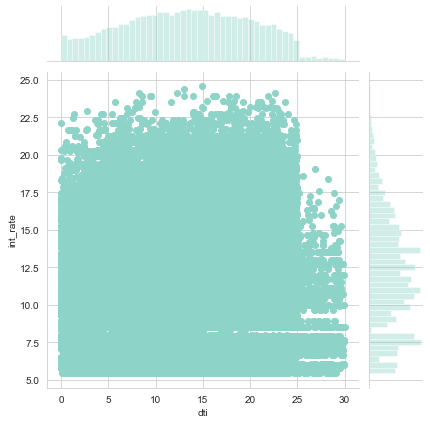

In [48]:
sns.jointplot('dti', 'int_rate', df)
plt.show()

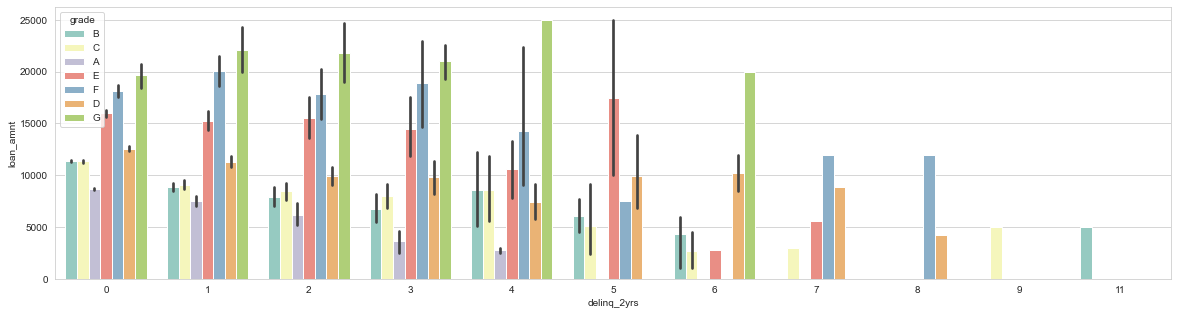

In [49]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=df, estimator=np.mean)
plt.show()

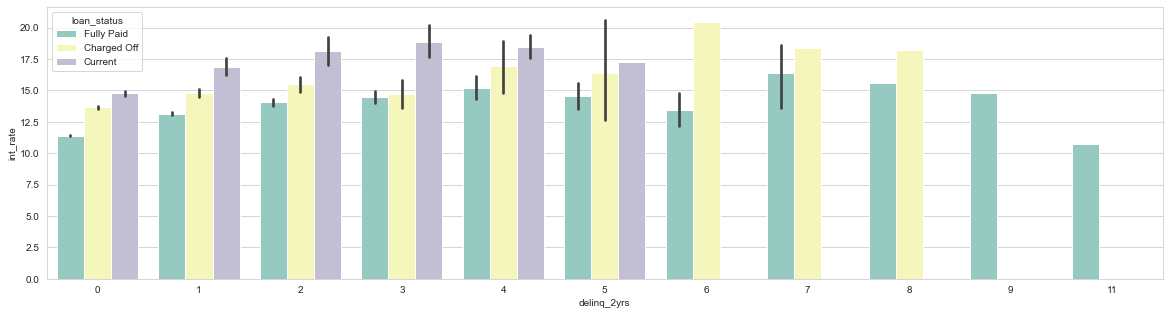

In [50]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=df, estimator=np.mean)
plt.show()

### Lets do the analysis of Laon across different income groups

In [51]:
df.annual_inc.describe()

count    39717.000000
mean        68.968926
std         63.793766
min          4.000000
25%         40.404000
50%         59.000000
75%         82.300000
max       6000.000000
Name: annual_inc, dtype: float64

In [52]:
df['income_category'] = np.nan
lst = [df]
for col in lst:
    col.loc[col['annual_inc'] <= 50, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 50) & (col['annual_inc'] <= 75), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 75, 'income_category'] = 'High'
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Issue_Month,Issue_Year,last_credit_pull_month,last_credit_pull_Year,last_pymnt_month,last_pymnt_year,earl_cr_line_month,earl_cr_line_year,Region,Loan_Result,Loan_to_inc_ration,income_category
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10,RENT,24.000,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,11,MAY,16,JAN,15,JAN,85,Mountain_West,17.263104,20.833333,Low
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30.000,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,11,SEP,13,APR,13,APR,99,Southeast,-59.651600,8.333333,Low
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10,RENT,12.252,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,11,MAY,16,JUN,14,NOV,01,Great_Lakes,25.236119,19.588639,Low
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49.200,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,11,APR,16,JAN,15,FEB,96,Far_West,22.318900,20.325203,Low
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80.000,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,11,MAY,16,MAY,16,JAN,96,Northwest,17.111000,3.750000,High


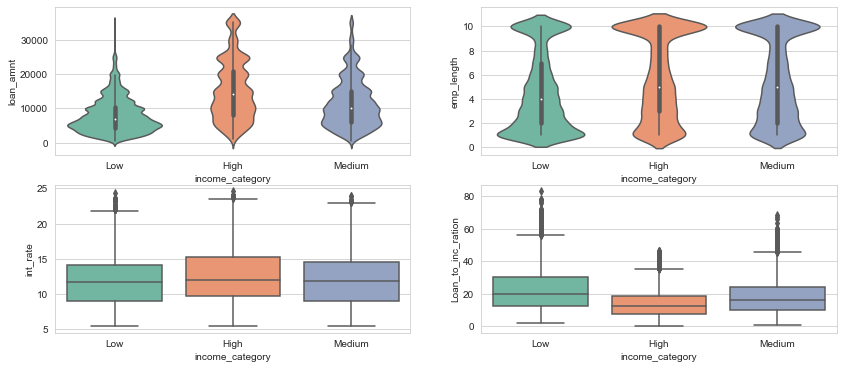

In [53]:
# Plot of income category vs different variables
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

sns.violinplot(x="income_category", y="loan_amnt", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="emp_length", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="int_rate", data=df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="Loan_to_inc_ration", data=df, palette="Set2", ax=ax4)
plt.show()

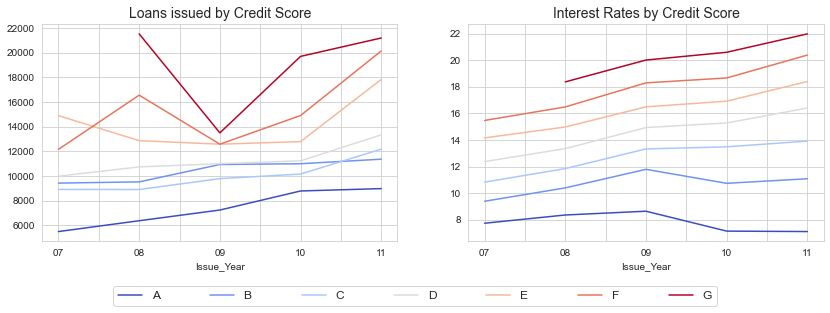

In [54]:
# Let's Plot how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['Issue_Year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['Issue_Year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12}, ncol=7, mode="expand", borderaxespad=0.)
plt.show()
